In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('supermarket_sales.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#no null values are present in the dataset
#Date,Time ARE string so these need to be changed 

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df=df.drop(['Invoice ID'],axis=1)
#dropping Invoice ID column as it is not useful in our analysis

In [12]:
df['gross margin percentage'].unique()

array([4.76190476])

In [13]:
df.duplicated().value_counts()

False    1000
dtype: int64

Since we do not have anu null values or duplicates we can go ahead and convert the column values into thier corresponding datatypes.

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df['Time']=pd.to_datetime(df['Time'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [17]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

### Checking if the store is more popular to a particular gender or not

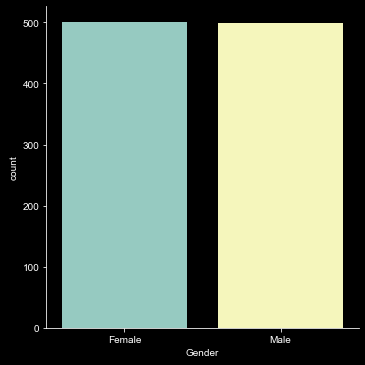

In [18]:
sns.catplot(x='Gender',kind='count',data= df)
sns.set(rc={'figure.figsize':(5,7)},palette='Paired')

There is no difference in the amount of female and male customers visiting the store.

### Analyzing the customer rating column

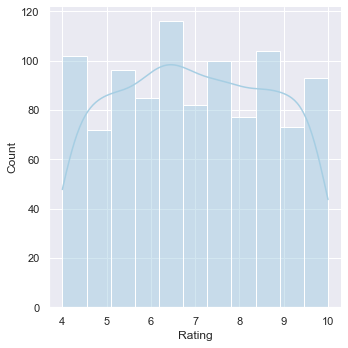

In [19]:
sns.displot(x='Rating',data=df,kde=True)
plt.show()

The distribution seems to be almost uniform with a slight deviation from the normal.Lets check the skewness of the distribution using skew function of pandas library

In [20]:
df['Rating'].skew()

0.00900964876573073

A skewnwss of 0.009 is very low and so the distribution can be said to be unskewed.

### Now i want to check the aggregate sales across the branches

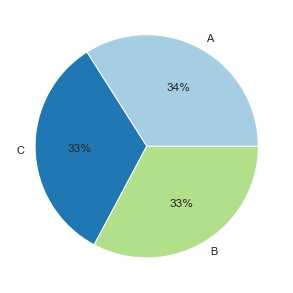

In [21]:
plt.pie(df['Branch'].value_counts(),labels=df['Branch'].unique(),autopct='%0.0f%%')
plt.show()

The pie chart represents the relative amount of total sales happening across branches A,B AND C.All three of these branches seem to be fairing well in thier respective locations.

### Lets see what is the most popular payment method used by customers

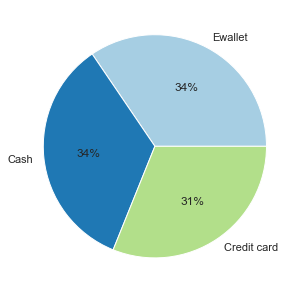

In [22]:
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].unique(),autopct='%0.0f%%')
plt.show()

E-wallet and Cash are the most used methods.

### Does gross income affect customer rating?

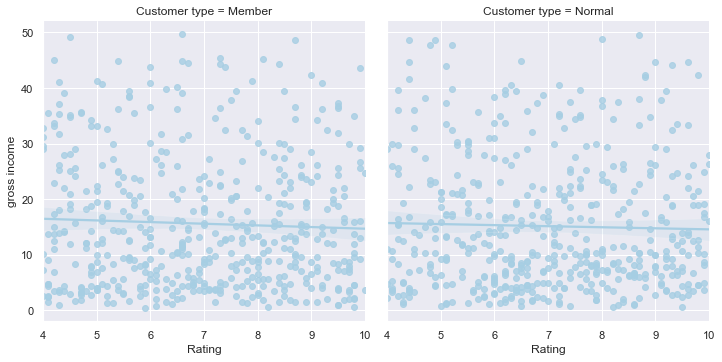

In [23]:
sns.lmplot(x='Rating',y='gross income',data=df,col='Customer type')

The linier model plot gives a scatter plot along with a linier model approximation of the data points .From the plot it seems like there is no relation between customers rating and the income the store generates on the order.

### Lets Check ,which is the most profitable branch?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

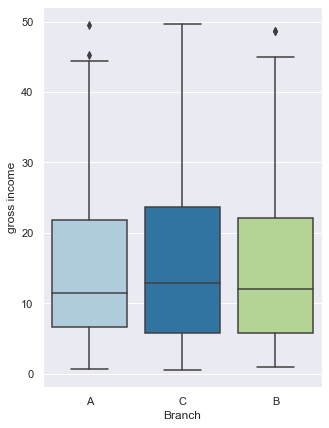

In [24]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

Evidently the branch C is doing the better than the other branches by a small margin.

### Relationship between Gender and Gross Income

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

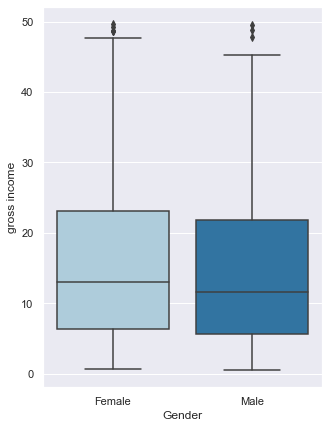

In [25]:
sns.boxplot(x='Gender',y='gross income',data=df)

Gross income is similar for both male and female customers but there is a slightly higher mean of income generated from female. 

###  Trend in gross income

(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

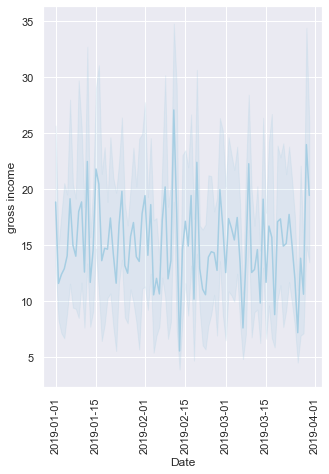

In [26]:
sns.lineplot(x=df.Date,y=df['gross income'])
plt.xticks(rotation=90)


As we can see in the plot above,there is no certain trend which the income generated follows depending on the time series of dates provided in the data set. 

### Which product line generates the most income?

In [27]:
df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-12-27 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-12-27 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-12-27 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-12-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-12-27 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Which product line helps generate the most income?

In [28]:
totalsales=df[["Product line","gross income"]].groupby(['Product line'],as_index= False).sum().sort_values(by= 'gross income',ascending= False)
totalsales

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Sports and travel'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Fashion accessories'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

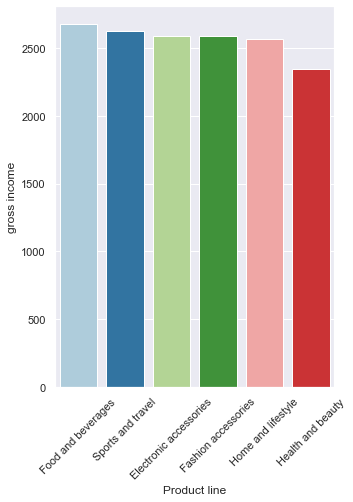

In [29]:
sns.barplot(x='Product line',y='gross income',data=totalsales)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)


When we calculate the total sum of income generated from each product line ,we see that Food and Beverages AND Sports and Travel has the highest values.

### Spending pattern of both males and females(which category do they spend more)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

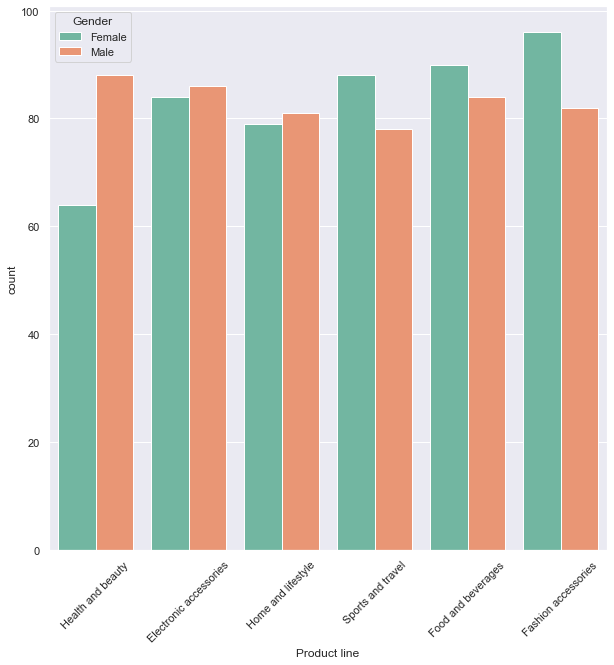

In [30]:
sns.countplot(df['Product line'],hue=df.Gender,palette='Set2')
plt.xticks(rotation=45)



Males spend more on Health and Beauty than females .

Females purchase more Fashion accessories and Sports and Travel than males.

### Which day of the week has maximum sales?

In [1]:
df['day'] = df['Date'].dt.day_name()   #to get the day of the date column
df.head()


NameError: name 'df' is not defined

<AxesSubplot:xlabel='day', ylabel='gross income'>

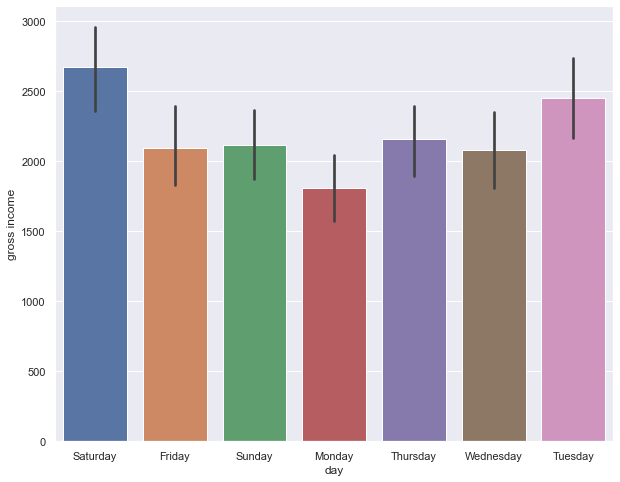

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='day',y='gross income',data=df,estimator=sum)
#using estimator=sum parameter to get the total gross income for each day in our plot rather than the mean of gross income .

Sales is highest on Saturday followed by Sunday and it was lowest on monday.Hence we can say that sales are higher on weekends and lower on weekdays.

### Now lets check which hour of the day is the busiest

In [35]:
df['Hour']=df['Time'].dt.hour
df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-12-27 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-12-27 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-12-27 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-12-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-12-27 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10


In [36]:
hourly_customer=df['Hour'].value_counts().reset_index()
hourly_customer

,index,Hour
0,19,113
1,13,103
2,15,102
3,10,101
4,18,93
5,11,90
6,12,89
7,14,83
8,16,77
9,20,75


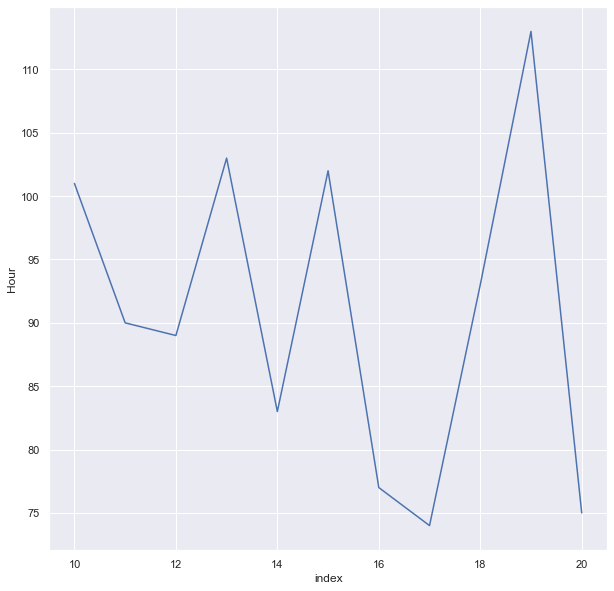

In [37]:
sns.lineplot(x='index',y='Hour',data=hourly_customer)
sns.set(rc={'figure.figsize':(14,7)})

Looks like the 19th hour,that is 7PM IN THE EVENING IS THE BUSIEST HOUR OF THE DAY WITH THE MOST AMOUNT OF CUSTOMERS PURCHASING ITEMS.

### What product line should the supermarket focus on?

HERE WE CAN HAVE TWO APPROCHES by which we can ANSWER THIS QUESTION.
1)By looking for the highest rated product line
2)By looking for the most sold products

<Figure size 864x720 with 0 Axes>

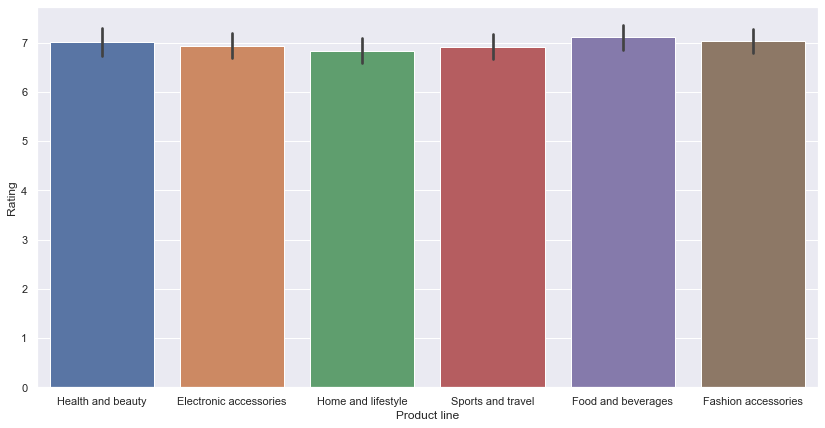

<Figure size 864x720 with 0 Axes>

In [38]:
sns.barplot(x='Product line',y='Rating',data=df)
plt.figure(figsize=(12,10))

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

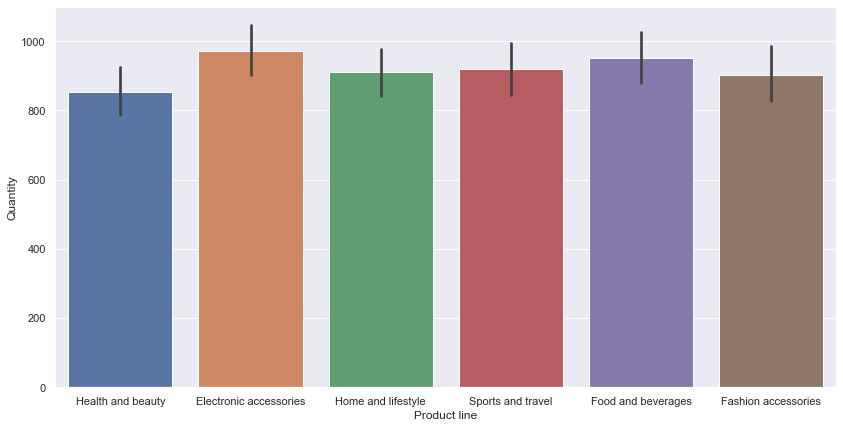

In [39]:
sns.barplot(x='Product line',y='Quantity',data=df,estimator=sum)

Rating for Fashion Accessories AND Food and Beverages is high but we can see that quantity purchased is high for Electronic accessories AND Food and Beverages.SO IN ORDER TO MEET THE DEMAND,Electronic accessories and Food and Beverages need to be on top priority.

### Now lets check where can we open a new store for expansion of the buisness

<AxesSubplot:xlabel='City', ylabel='gross income'>

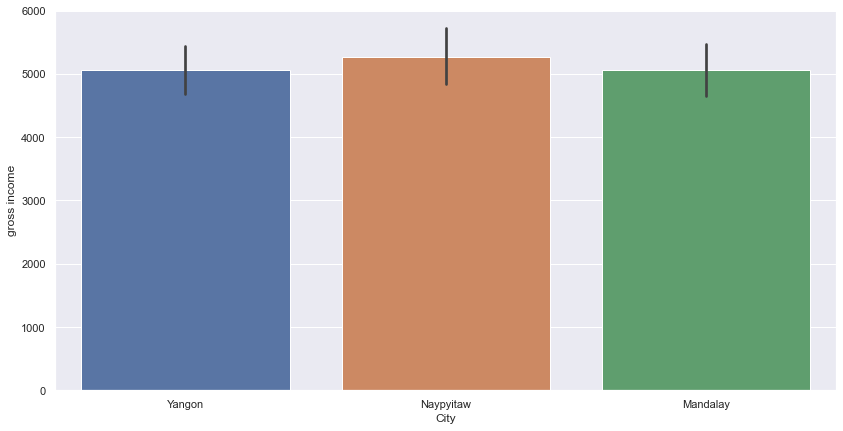

In [40]:
sns.barplot(x='City',y='gross income',data=df,estimator=sum)

Since the city NAYPYITAW has the highest mean gross income we should plan on expansion of branches in that city.

<AxesSubplot:xlabel='Product line', ylabel='count'>

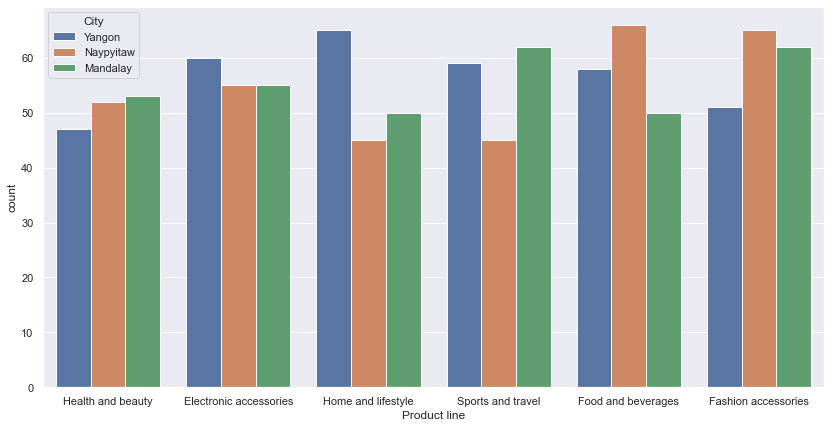

In [41]:
sns.countplot(df['Product line'],hue=df['City'])

Since the product lines of Fashion accessories and Food and Beverages are the most popular it will be benificial if those two product lines are given higher priority over other product lines in terms of stocking,logistics,quality and other aspects. 

In [8]:
d=pd.read_csv('supermarket_sales.csv')
print("Dataset contains {} row and {} colums".format(d.shape[0],d.shape[1]))

NameError: name 'pd' is not defined

In [ ]:
np.round(d.corr(),2)

In [ ]:
plt.figure(dpi=125)
sns.heatmap(np.round(d.corr(),2),annot=True,cmap='RdYlBu_r')
plt.show()

In [10]:
d["Time"]= pd.to_datetime(d["Time"])
d["Hour"]= (d["Time"]).dt.hour
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = d).set_title("product sales per Hour")

NameError: name 'pd' is not defined

In [11]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = d) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

NameError: name 'plt' is not defined

# analysis based upon gender

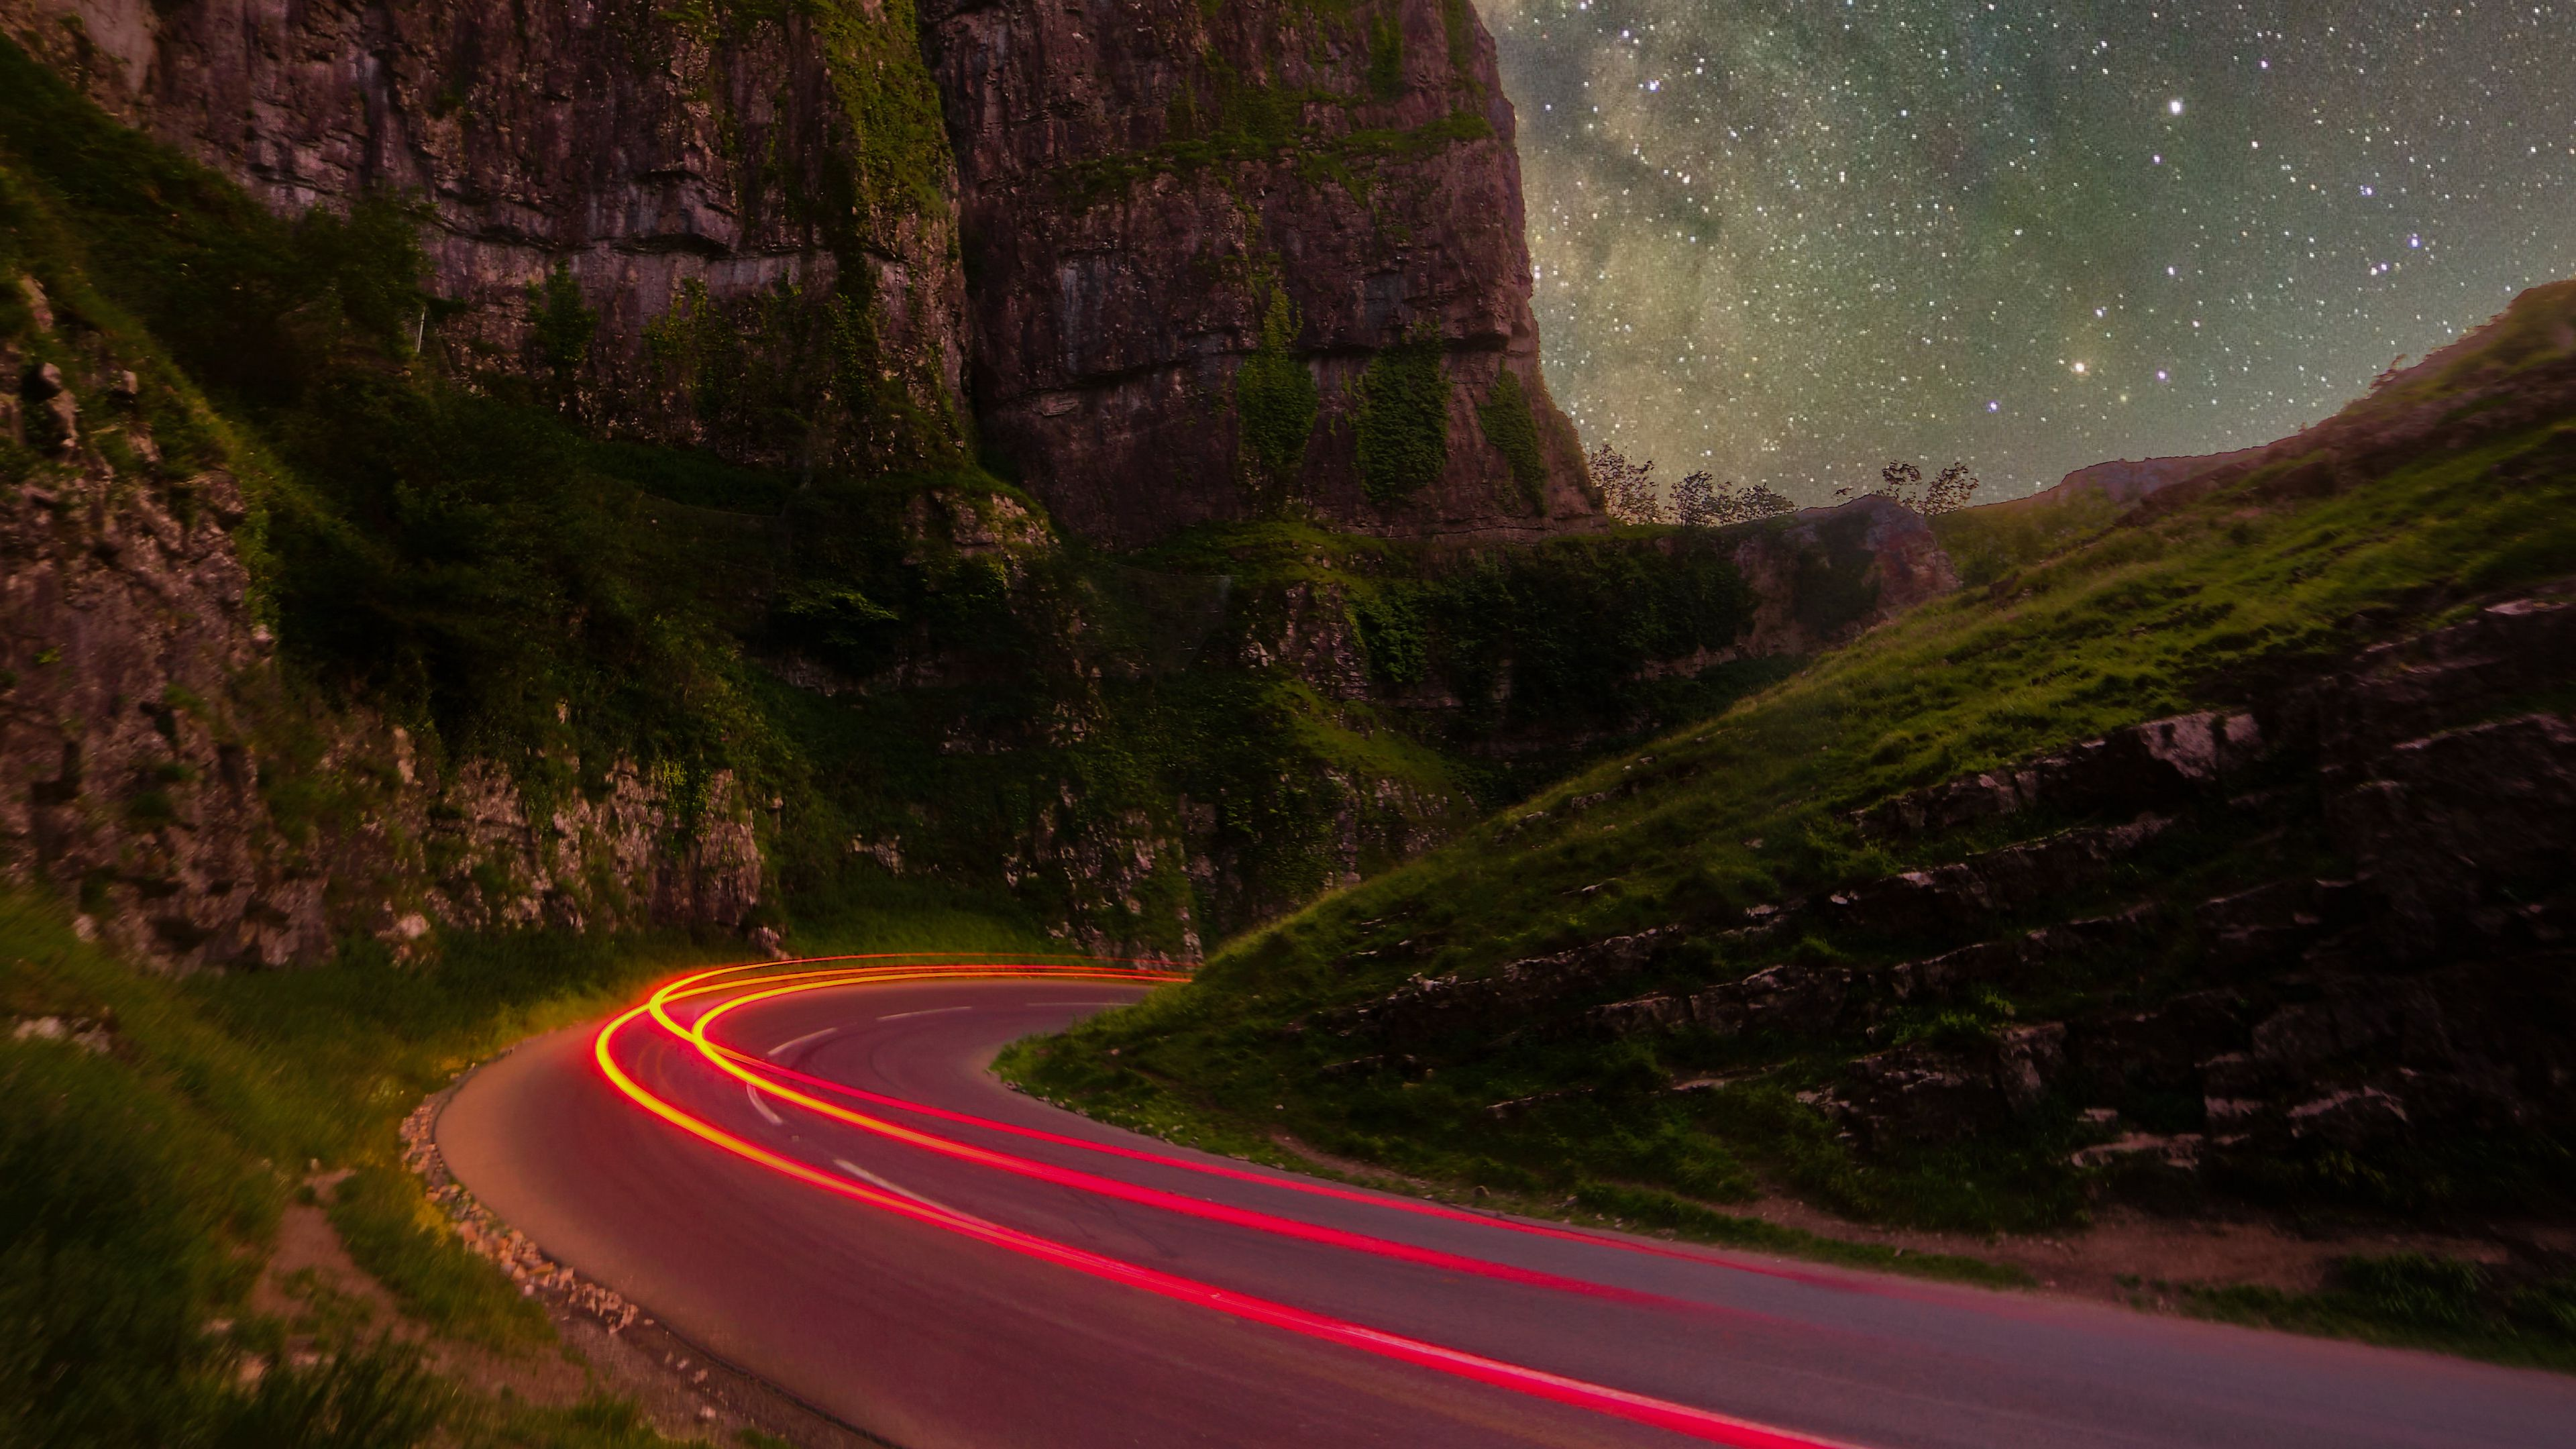

In [ ]:
print(df.shape)
df['Gender'].value_counts()

In [ ]:
sns.countplot('Gender',data=df)

In [ ]:
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

In [ ]:
df=pd.concat([df,gender_dummies],axis=1)
df.head()

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Product line",y="Female", data = df)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Product line",y="Male", data = df)

# predictions

In [ ]:
#   (ii)if p value<0.05 then we will reject null hypothesis and accept the alternate hypothesis which say data is stationary
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['cogs'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df["cogs"], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [ ]:
#importing Sarimax and passing the parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
m=SARIMAX(df['cogs'], order=(3,1,0),seasonal_order=(2,1,0,12))
res=m.fit()

In [ ]:
df['arima_predict']=res.fittedvalues

In [12]:
forecast=res.predict(start=len(df),end=len(df)+35)

NameError: name 'res' is not defined

In [ ]:
forecast

In [ ]:

df['cogs'].append(forecast)

In [ ]:
#plot between historical data and forecasted data
plt.figure(figsize=(20, 12))
plt.plot(df['cogs'],label="historical data")
plt.plot(forecast,label="forecasted data")
plt.legend()